In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import BatchNormalization, Dropout
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0



Epoch 1/5


1563/1563 [==============================] - 343s 217ms/step - loss: 1.3048 - accuracy: 0.5422 - val_loss: 1.0750 - val_accuracy: 0.6246
Epoch 2/5
1563/1563 [==============================] - 333s 213ms/step - loss: 0.8881 - accuracy: 0.6912 - val_loss: 0.9000 - val_accuracy: 0.6865
Epoch 3/5
1563/1563 [==============================] - 332s 212ms/step - loss: 0.6899 - accuracy: 0.7614 - val_loss: 0.8134 - val_accuracy: 0.7177
Epoch 4/5
1563/1563 [==============================] - 344s 220ms/step - loss: 0.5471 - accuracy: 0.8110 - val_loss: 0.8184 - val_accuracy: 0.7202
Epoch 5/5
313/313 [==============================] - 23s 72ms/step - loss: 0.7858 - accuracy: 0.7390
Epoch 1/5
1563/1563 [==============================] - 368s 233ms/step - loss: 1.3485 - accuracy: 0.5258 - val_loss: 1.0706 - val_accuracy: 0.6225
Epoch 2/5
1563/1563 [==============================] - 700s 448ms/step - loss: 0.9280 - accuracy: 0.6776 - val_loss: 0.8938 - val_accuracy: 0.6830
Epoch 3/5
156

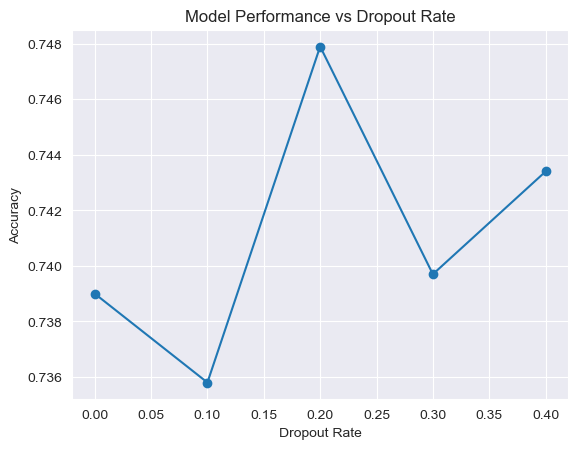

In [4]:
dropout_rates = [0.0, 0.1, 0.2, 0.3, 0.4]
accuracies_dropout = []

for dropout_rate in dropout_rates:
    # Create the model with the current dropout rate
    model = models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
    model.add(BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(layers.Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

    # Evaluate the model and record accuracy
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    accuracies_dropout.append(test_acc)

# Plotting
plt.plot(dropout_rates, accuracies_dropout, marker='o')
plt.xlabel('Dropout Rate')
plt.ylabel('Accuracy')
plt.title('Model Performance vs Dropout Rate')
plt.show()
